# LV 2.

[1차] 캐시

https://school.programmers.co.kr/learn/courses/30/lessons/17680

**문제 설명**

    지도개발팀에서 근무하는 제이지는 지도에서 도시 이름을 검색하면 해당 도시와 관련된 맛집 게시물들을 데이터베이스에서 읽어 보여주는 서비스를 개발하고 있다.
    이 프로그램의 테스팅 업무를 담당하고 있는 어피치는 서비스를 오픈하기 전 각 로직에 대한 성능 측정을 수행하였는데, 제이지가 작성한 부분 중 데이터베이스에서 게시물을 가져오는 부분의 실행시간이 너무 오래 걸린다는 것을 알게 되었다.
    어피치는 제이지에게 해당 로직을 개선하라고 닦달하기 시작하였고, 제이지는 DB 캐시를 적용하여 성능 개선을 시도하고 있지만 캐시 크기를 얼마로 해야 효율적인지 몰라 난감한 상황이다.

    어피치에게 시달리는 제이지를 도와, DB 캐시를 적용할 때 캐시 크기에 따른 실행시간 측정 프로그램을 작성하시오.
    
    
**입력 형식**

    캐시 크기(cacheSize)와 도시이름 배열(cities)을 입력받는다.
    cacheSize는 정수이며, 범위는 0 ≦ cacheSize ≦ 30 이다.
    cities는 도시 이름으로 이뤄진 문자열 배열로, 최대 도시 수는 100,000개이다.
    각 도시 이름은 공백, 숫자, 특수문자 등이 없는 영문자로 구성되며, 대소문자 구분을 하지 않는다. 도시 이름은 최대 20자로 이루어져 있다.
    
**출력 형식**

    입력된 도시이름 배열을 순서대로 처리할 때, "총 실행시간"을 출력한다.
    
**조건**

    캐시 교체 알고리즘은 LRU(Least Recently Used)를 사용한다.
    cache hit일 경우 실행시간은 1이다.
    cache miss일 경우 실행시간은 5이다.
    
**입출력 예제**

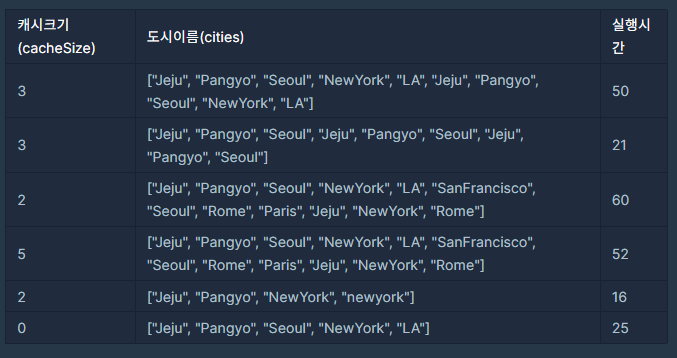

In [79]:
def solution(cacheSize, cities):
    answer = 0
    cache = []
    cities = list(map(lambda x: x.lower(), cities))
    
    if cacheSize ==0:
        return len(cities)*5
    
    for city in cities:
        if city not in cache:
            answer +=5
            if len(cache) < cacheSize:
                cache.append(city)
            else:
                cache.pop(0)
                cache.append(city)
                
        else:
            answer+=1
            cache.remove(city)
            cache.append(city)
    
    return answer


In [80]:
print(solution(3, ["Jeju", "Pangyo", "Seoul", "NewYork", "LA", "Jeju", "Pangyo", "Seoul", "NewYork", "LA"]))
print(solution(3, ["Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul"]))
print(solution(2, ["Jeju", "Pangyo", "Seoul", "NewYork", "LA", "SanFrancisco", "Seoul", "Rome", "Paris", "Jeju", "NewYork", "Rome"]))
print(solution(5, ["Jeju", "Pangyo", "Seoul", "NewYork", "LA", "SanFrancisco", "Seoul", "Rome", "Paris", "Jeju", "NewYork", "Rome"]))
print(solution(2, ["Jeju", "Pangyo", "NewYork", "newyork"]))
print(solution(0, ["Jeju", "Pangyo", "Seoul", "NewYork", "LA"]))

50
21
60
52
16
25


In [61]:
cSize = 3
cities = ["Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul"]
cache = []
answer = 0

cities = list(map(lambda x: x.lower(), cities))

if cSize==0:
    answer= len(cities)*5

for city in cities:
    print(city)
    if city in cache:
        answer += 1
        cache.remove(city)
        cache.append(city)
    else:
        answer +=5
        if len(cache) < cSize:
            cache.append(city)
        else:
            cache.pop(0)
            cache.append(city)
            
answer

jeju
pangyo
seoul
jeju
pangyo
seoul
jeju
pangyo
seoul


21

    - 어제 혼공컴운에서 페이지 교체 알고리즘 봤다고 기가막히게 이게 나와버리네
**`LRU(Least Recently Used)`** : 가장 오랫동안 사용하지 않은 페이지를 교체하는 알고리즘

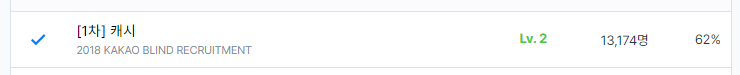

**다른 사람 풀이**

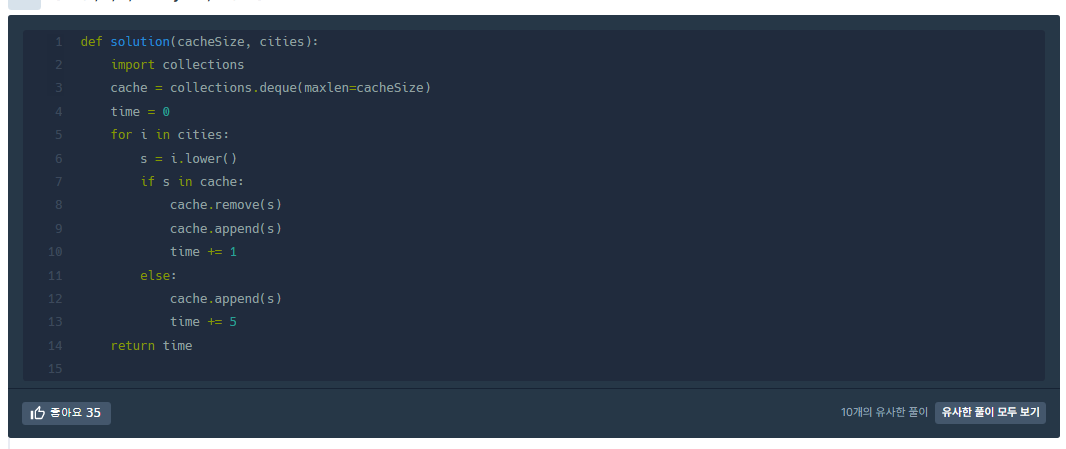

    deque를 이용해서 maxlen으로 풀이한..